In [1]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

In [2]:
wcat = pd.read_csv("./wc-at.csv")

In [3]:
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [4]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

<BarContainer object of 109 artists>

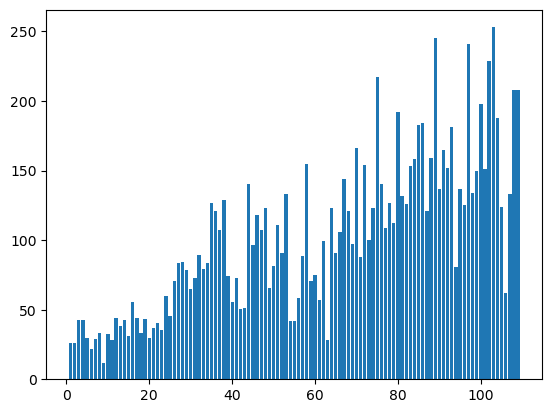

In [6]:
plt.bar(height = wcat.AT, x = np.arange(1, 110, 1)) #barplot

(array([14., 18., 16., 13., 17., 14.,  4.,  6.,  3.,  4.]),
 array([ 11.44 ,  35.596,  59.752,  83.908, 108.064, 132.22 , 156.376,
        180.532, 204.688, 228.844, 253.   ]),
 <BarContainer object of 10 artists>)

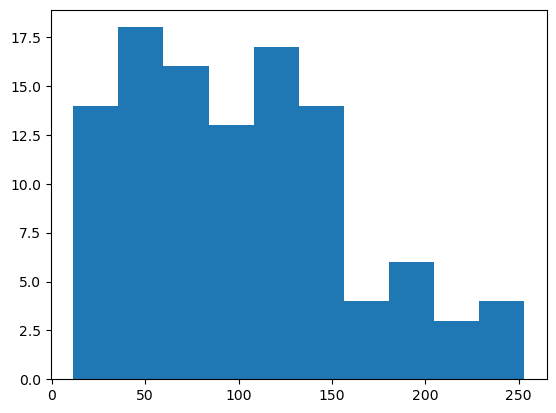

In [7]:
plt.hist(wcat.AT) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4ad79a450>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4ad79a900>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4ad6ce660>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4ad79aed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4ad79b1a0>],
 'means': []}

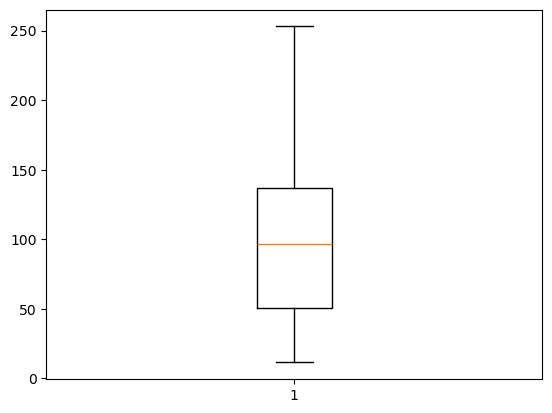

In [8]:
plt.boxplot(wcat.AT) #boxplot

<BarContainer object of 109 artists>

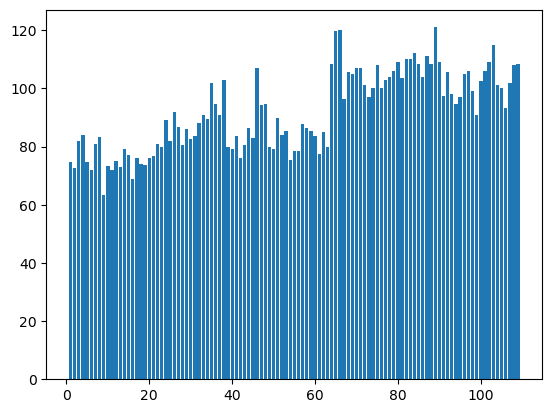

In [9]:
plt.bar(height = wcat.Waist, x = np.arange(1, 110, 1))

(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <BarContainer object of 10 artists>)

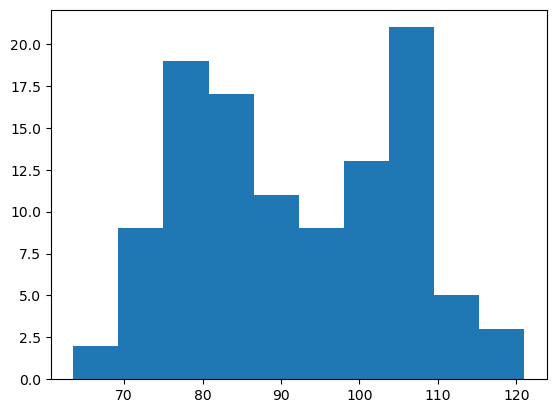

In [10]:
plt.hist(wcat.Waist) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4aec15940>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4aec15ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4ad79b320>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4ada3ff20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4aec16030>],
 'means': []}

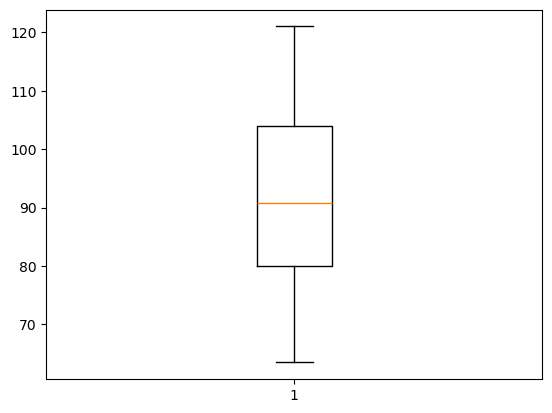

In [11]:
plt.boxplot(wcat.Waist) #boxplot

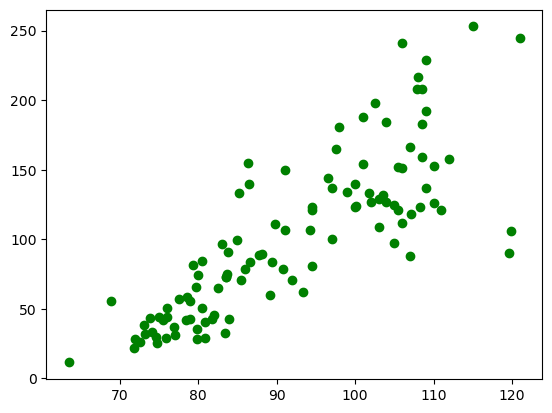

In [12]:
# Scatter plot
plt.scatter(x = wcat['Waist'], y = wcat['AT'], color = 'green') 

In [13]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(wcat.Waist, wcat.AT)[0, 1]
cov_output

635.9100064135235

In [14]:
wcat.cov()


,Waist,AT
Waist,183.849626,635.910006
AT,635.910006,3282.689835


In [15]:

# Import library
import statsmodels.formula.api as smf

In [33]:
# Simple Linear Regression
model = smf.ols('AT ~ Waist', data = wcat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.62e-27
Time:                        21:54:52   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred1 = model.predict(pd.DataFrame(wcat['Waist']))
pred1

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

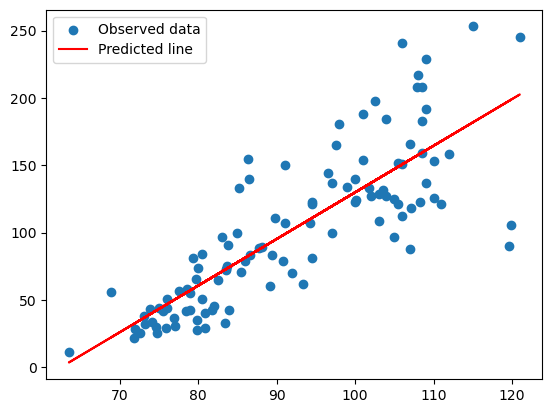

In [22]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [35]:
# Error calculation
res1 = wcat.AT - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

32.760177495755144

# Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

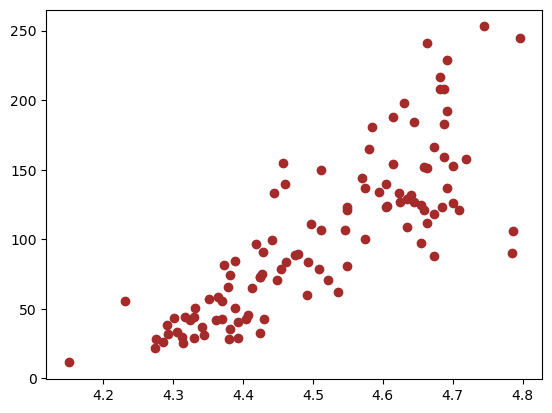

In [36]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(wcat['Waist']), y = wcat['AT'], color = 'brown')

In [37]:
np.corrcoef(np.log(wcat.Waist), wcat.AT) #correlation

array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

In [38]:
model2 = smf.ols('AT ~ np.log(Waist)', data = wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.80e-28
Time:                        21:55:13   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

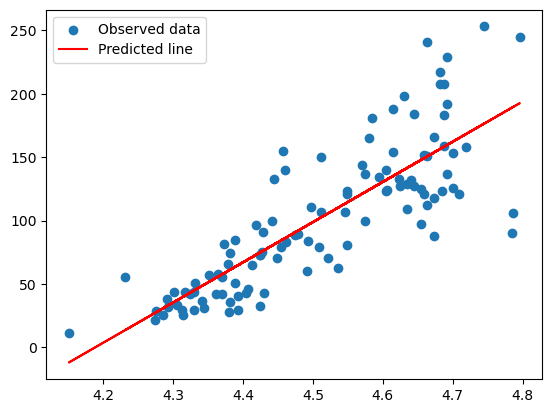

In [41]:
# Regression Line
plt.scatter(np.log(wcat.Waist), wcat.AT)
plt.plot(np.log(wcat.Waist), pred2, "r")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [42]:
# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

32.49688490932126

## Exponential transformation
# x = waist; y = log(at)

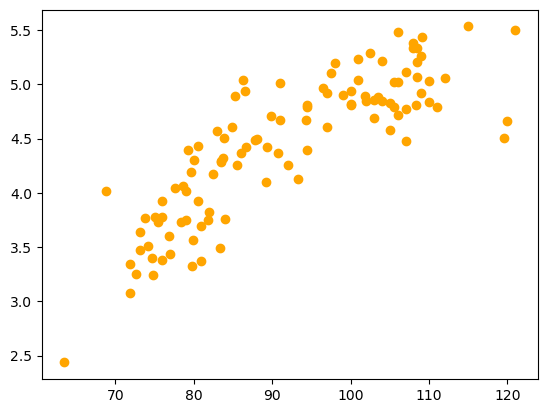

In [45]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['Waist'], y = np.log(wcat['AT']), color = 'orange')

In [46]:
np.corrcoef(wcat.Waist, np.log(wcat.AT)) #correlation

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

In [47]:
model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.68e-30
Time:                        22:05:03   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pred3 = model3.predict(pd.DataFrame(wcat['Waist']))
pred3


0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

In [51]:
pred3_at = np.exp(pred3)
pred3_at

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

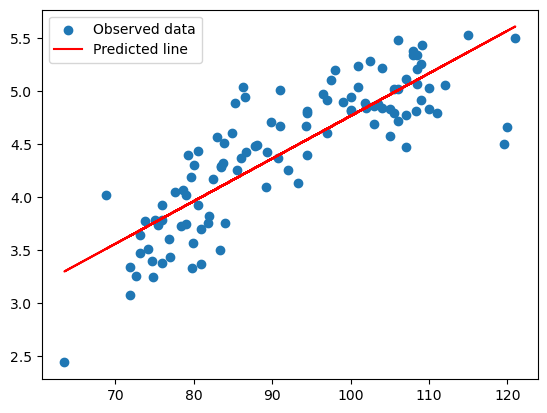

In [53]:
# Regression Line
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "r")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [54]:
# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

38.529001758071416

# Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

In [55]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = wcat).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.80e-35
Time:                        22:10:09   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
pred4 = model4.predict(pd.DataFrame(wcat))
pred4

0      3.604938
1      3.434844
2      4.096771
3      4.226660
4      3.597235
         ...   
104    4.901980
105    4.682251
106    4.942227
107    5.038287
108    5.043650
Length: 109, dtype: float64

In [57]:
pred4_at = np.exp(pred4)
pred4_at

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [66]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
#y = wcat.iloc[:, 1].values



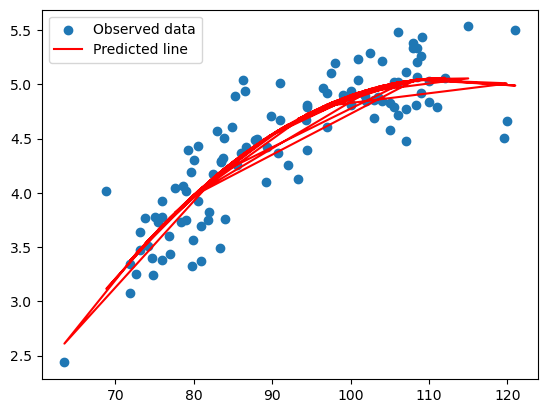

In [86]:
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(X, pred4, color = 'red')
plt.legend(['Observed data','Predicted line'])
plt.show()

In [87]:
# Error calculation
res4 = wcat.AT - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

32.244447827759956

In [91]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,32.760177
1,Log model,32.496885
2,Exp model,38.529002
3,Poly model,32.244448


# The best model

In [92]:
###################
# The best model

from sklearn.model_selection import train_test_split

In [104]:
train, test = train_test_split(wcat, test_size = 0.2)

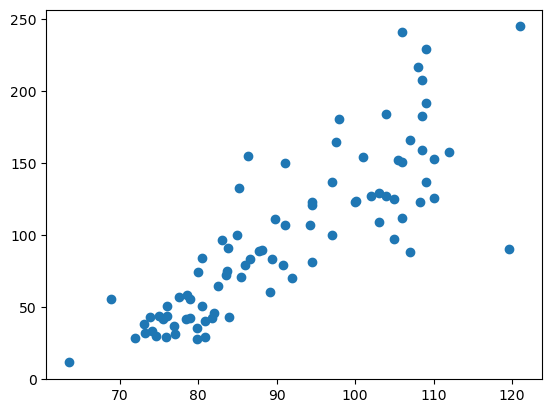

In [105]:
#Optional
plt.scatter(train.Waist,train.AT)
plt.show()

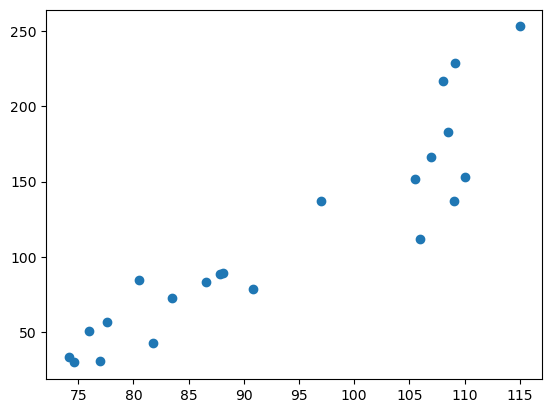

In [103]:
#Optional
plt.scatter(test.Waist,test.AT)
plt.show()

In [106]:
finalmodel = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.52e-28
Time:                        22:42:55   Log-Likelihood:                -16.887
No. Observations:                  87   AIC:                             39.77
Df Residuals:                      84   BIC:                             47.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.9071      1.624     -4.253      0.000     -10.137      -3.677
Waist                0.2092      0.036      5.874      0.000       0.138       0.280
I(Waist * Waist)    -0.0009      0.000     -4.751      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.643   Durbin-Watson:                   2.422
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.355
Skew:                           0.150   Prob(JB):                        0.837
Kurtosis:                       3.090   Cond. No.                     4.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

43      78.233309
66     119.226672
97     128.743684
65     156.532567
48      52.924843
1       32.158919
103    135.780930
75     132.336282
105    106.279306
67     149.019435
106    138.418964
5       30.346729
49      51.586161
40      66.532037
86     158.786729
45     152.664574
80     143.637682
99     140.634348
0       37.760599
107    154.249771
7       66.154977
102    160.618756
dtype: float64

In [108]:
# Model Evaluation on Test data
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

38.42750583029438

In [112]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

30      66.532037
12      33.407704
11      38.451204
100    150.224521
26      78.634681
          ...    
23      89.251029
19      41.004857
73     132.336282
72     121.182665
10      30.465273
Length: 87, dtype: float64

In [113]:
# Model Evaluation on train data
train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

30.45801129345627